In [2]:
import scipy.special
import numpy

In [65]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        self.lr = learningrate

        self.wih = numpy.random.normal(0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        self.activation_function = lambda x: scipy.special.expit(x)

    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        # 分割误差
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # 更新权重
        self.who += self.lr * numpy.dot(output_errors * final_outputs \
                    * (1 - final_outputs), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot(hidden_errors * hidden_outputs \
                    * (1 - hidden_outputs), numpy.transpose(inputs))

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [66]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [67]:
# 加载训练数据
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

epochs = 1

# 训练神经网络
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = numpy.asarray(all_values[1:], dtype=float) / 255 * 0.99 + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

print('训练完成')

训练完成


In [68]:
scorecard = []

# 加载测试数据
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# 测试神经网络
for record in test_data_list:
    all_values = record.split(',')
    inputs = numpy.asarray(all_values[1:], dtype=float) / 255 * 0.99 + 0.01
    outputs = n.query(inputs)
    correct_label = int(all_values[0])
    label = numpy.argmax(outputs)  # result = outputs.tolist().index(max(outputs))
    is_correct = correct_label == label
    # print(f"Result: {label}    Answer:{correct_label}    Correct:{is_correct}")
    scorecard.append(1) if is_correct else scorecard.append(0)

scorecard_array = numpy.asarray(scorecard)
print(f"Performance = {scorecard_array.sum() / scorecard_array.size}")

Performance = 0.9601


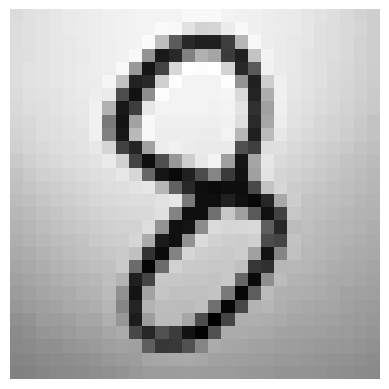

[[0.084331  ]
 [0.0087905 ]
 [0.06377938]
 [0.07438881]
 [0.00497359]
 [0.11555829]
 [0.06057943]
 [0.02283134]
 [0.68937908]
 [0.08293705]]
Result: 8


In [74]:
# 使用自定义手写数字对神经网络进行测试
from PIL import Image
import matplotlib.pyplot as plt
import numpy

# 读取图片
img_path = './numbers/number8.jpg'
img = Image.open(img_path)

# 缩放为28x28
img = img.resize((28, 28))

# 转为灰度图像
img = img.convert('L')

# 将图像转为numpy数组
img_array = numpy.array(img)

# 确保值在[0,255]范围内
img_array = numpy.clip(img_array, 0, 255)

# 使用matplotlib显示图像
plt.imshow(img_array, cmap='gray')
plt.axis('off')  # 隐藏坐标轴
plt.show()

# 测试神经网络
# Flatten the 28x28 array to a 1D array of 784 elements
inputs = numpy.asarray(img_array, dtype=float).flatten() / 255 * 0.99 + 0.01
outputs = n.query(inputs)
print(outputs)
label = numpy.argmax(outputs)
print(f'Result: {label}')